In [1]:
%pylab inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from methods import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Loads files as dataframes
data_ent_followup = create_df("f_Sections F,G,h - Ent.dta", "Analysis files/data/Followup/{0}")

data_edu_baseline = create_df("education.dta", "Analysis files/data/Baseline/{0}")

data_ent_baseline = create_df("Sections F,G,h - Ent.dta", "Analysis files/data/Baseline/{0}")

data_age_baseline = create_df("personal info.dta", "Analysis files/data/Baseline/{0}")

In [3]:
#Removes attrition from the baseline dataframes
updated_edu_baseline = remove_attrition(data_edu_baseline, data_ent_followup)
updated_ent_baseline = remove_attrition(data_ent_baseline, data_ent_followup)
updated_age_baseline = remove_attrition(data_age_baseline, data_ent_followup)

Number of households at followup:  961
Number of households at adjusted baseline:  961
Number of households at followup:  961
Number of households at adjusted baseline:  961
Number of households at followup:  961
Number of households at adjusted baseline:  961


In [4]:
#Creates big array with the desired columns of edu_baseline, ent_baseline, and ent_followup.
#Contains the columns specified below.
#Corrects NaN values to zero.
ent_edu_master = updated_ent_baseline[['treatment_x', 'rescode', 'enterprise', 'soleent']].join(data_ent_followup[['f_enterprise', 'f_soleent']])
ent_edu_master = ent_edu_master.join(updated_edu_baseline[["edulow", "eduvoc", "eduhigh"]])
ent_edu_master = ent_edu_master.join(updated_age_baseline[["age"]])
ent_edu_master = ent_edu_master.fillna(0)

In [5]:
ent_edu_master.loc[ent_edu_master.age==1, 'age'] = 2
ent_edu_master.loc[ent_edu_master.age==6, 'age'] = 5

#Find number of participants in each age bin
ent_edu_master['age'] = ent_edu_master['age'].apply(lambda x: x//10)
ent_edu_master.loc[ent_edu_master.age==1, 'age'] = 2
ent_edu_master.loc[ent_edu_master.age==6, 'age'] = 5
ageBin0 = len(ent_edu_master.loc[ent_edu_master['age'] == 0, :])
ageBin1 = len(ent_edu_master.loc[ent_edu_master['age'] == 1, :])
ageBin2 = len(ent_edu_master.loc[ent_edu_master['age'] == 2, :])
ageBin3 = len(ent_edu_master.loc[ent_edu_master['age'] == 3, :])
ageBin4 = len(ent_edu_master.loc[ent_edu_master['age'] == 4, :])
ageBin5 = len(ent_edu_master.loc[ent_edu_master['age'] == 5, :])
ageBin6 = len(ent_edu_master.loc[ent_edu_master['age'] == 6, :])
ageBin7 = len(ent_edu_master.loc[ent_edu_master['age'] == 7, :])
ageBin8 = len(ent_edu_master.loc[ent_edu_master['age'] == 8, :])
ageBin9 = len(ent_edu_master.loc[ent_edu_master['age'] == 9, :])

print(ageBin0)
print(ageBin1)
print(ageBin2)
print(ageBin3)
print(ageBin4)
print(ageBin5)
print(ageBin6)
print(ageBin7)
print(ageBin8)
print(ageBin9)

0
0
142
323
354
142
0
0
0
0


In [6]:
#Creates new data frame with twice as many rows (first set for baseline, second for followup) 
ent_edu_graphing = ent_edu_master.copy();
ent_edu_graphing = ent_edu_graphing.append(ent_edu_graphing, ignore_index=True)
#new row to indicate baseline (false) or followup (true)
ent_edu_graphing['baselineOrFollowup'] = ent_edu_graphing.index > len(ent_edu_master.index) - 1

#adds combined_enterprise that contains enterprise for the first half and f_enterprise for the second half
df = pd.DataFrame({'enterprise': ent_edu_master['enterprise'].append(ent_edu_master['f_enterprise'], ignore_index=True)})
ent_edu_graphing['combined_enterprise'] = df['enterprise']

#adds combined_enterprise that contains soleent for the first half and f_soleent for the second half
df = pd.DataFrame({'soleent': ent_edu_master['soleent'].append(ent_edu_master['f_soleent'], ignore_index=True)})
ent_edu_graphing['combined_soleent'] = df['soleent']

#add education column that has a 1,2, or 3 (and soon a 4) to indicate level of edu (or aggregate)
ent_edu_graphing['education'] = ent_edu_graphing['edulow'] + ent_edu_graphing['eduvoc'] * 2 + ent_edu_graphing['eduhigh'] * 3

#append ent_edu_graphing to itself with another education category of 4 in order to get aggregate of all edu types
copyDF = ent_edu_graphing.copy()
copyDF["education"] = 4
ent_edu_graphing = ent_edu_graphing.append(copyDF, ignore_index=True, sort=False)

#append ent_age_graphing to itself with another age category of 10 in order to get aggregate column of all age bins
copyDF = ent_edu_graphing.copy()
copyDF["age"] = 10
ent_edu_graphing = ent_edu_graphing.append(copyDF, ignore_index=True, sort=False)

print('rescode treatment_x enterprise soleent f_enterprise f_soleent edulow eduvoc eduhigh baselineOrFollowup education')

ent_edu_master

rescode treatment_x enterprise soleent f_enterprise f_soleent edulow eduvoc eduhigh baselineOrFollowup education


,treatment_x,rescode,enterprise,soleent,f_enterprise,f_soleent,edulow,eduvoc,eduhigh,age
0,0.0,11101,1,1.0,1,1.0,0.0,0.0,1.0,4.0
1,0.0,11102,1,1.0,0,0.0,0.0,0.0,1.0,4.0
2,0.0,11103,1,1.0,0,0.0,0.0,0.0,1.0,4.0
3,0.0,11201,0,0.0,1,0.0,0.0,0.0,1.0,3.0
4,0.0,11203,1,1.0,1,0.0,1.0,0.0,0.0,2.0
5,0.0,11301,1,0.0,1,0.0,0.0,1.0,0.0,4.0
6,0.0,11302,1,0.0,1,0.0,0.0,1.0,0.0,5.0
7,0.0,11304,1,1.0,0,0.0,1.0,0.0,0.0,3.0
8,0.0,11402,1,1.0,1,1.0,0.0,0.0,1.0,4.0
9,0.0,11403,1,0.0,1,0.0,0.0,0.0,1.0,5.0


In [7]:
df_control_graphing = ent_edu_graphing.loc[ent_edu_graphing['treatment_x'] == 0, :]
df_individual_graphing = ent_edu_graphing.loc[ent_edu_graphing['treatment_x'] == 1, :]
df_group_graphing = ent_edu_graphing.loc[ent_edu_graphing['treatment_x'] == 2, :]

In [8]:
df_control_master = ent_edu_master.loc[ent_edu_master['treatment_x'] == 0, :]
df_individual_master = ent_edu_master.loc[ent_edu_master['treatment_x'] == 1, :]
df_group_master = ent_edu_master.loc[ent_edu_master['treatment_x'] == 2, :]

In [9]:
#should have a difference of 31 percentage points from edulow control followup to edulow group loan followup. 
#Does not check out: 30% difference

print("control:")
percentages(df_control_master.loc[df_control_master['edulow'] == 1, :], "soleent")
print("\ngroup loan:")
percentages(df_group_master.loc[df_group_master['edulow'] == 1, :], "soleent")

control:
Percentage of soleent @ baseline:  33.33333333333333
Percentage of soleent @ followup:  33.33333333333333

group loan:
Percentage of soleent @ baseline:  36.84210526315789
Percentage of soleent @ followup:  63.1578947368421


In [10]:
#should have a difference of 9 percentage points from control followup to group loan followup. 
#Does not check out: ~7% difference
#Does check out: 39% in the control group
print("control:")
percentages(df_control_master, "soleent")
print("\ngroup loan:")
percentages(df_group_master, "soleent")

control:
Percentage of soleent @ baseline:  39.61538461538461
Percentage of soleent @ followup:  39.23076923076923

group loan:
Percentage of soleent @ baseline:  36.46723646723647
Percentage of soleent @ followup:  46.15384615384615


In [11]:
#should have a difference of 8 percentage points from control followup to group loan followup. 
#Checks out
print("control:")
percentages(df_control_master, "enterprise")
print("\ngroup loan:")
percentages(df_group_master, "enterprise")

control:
Percentage of enterprise @ baseline:  60.38461538461538
Percentage of enterprise @ followup:  58.46153846153847

group loan:
Percentage of enterprise @ baseline:  60.3988603988604
Percentage of enterprise @ followup:  66.95156695156696


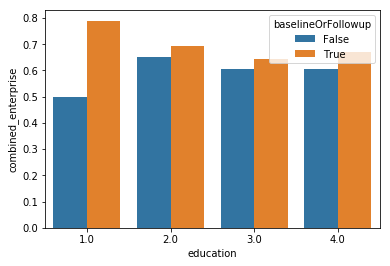

In [12]:
individualLoanGraphSoleent = sns.barplot(x='education', y="combined_enterprise", hue="baselineOrFollowup", data=df_group_graphing, ci=None)
#Why is there such a large drop in soleent here?
#This is the individual loan model. Perhaps younger women face stronger family/social pressure to give money 
#to others, compared to older (and perhaps more established female community figures).

In [88]:
#create new copy of dataframe for 'conversion rate' analysis
ent_edu_conv = ent_edu_master.copy()
ent_edu_conv['edu'] = ent_edu_conv['edulow'] + ent_edu_conv['eduvoc'] * 2 + ent_edu_conv['eduhigh'] * 3
model = 2

In [89]:
#prints 'conversion rates' for group loan model, soleent parameter, first split by age and second split by edu
for i in range(2, 6):
    cr = conversionRate(ent_edu_conv[(ent_edu_conv.treatment_x == model)&(ent_edu_conv.age == i)])
    print("Conversion rate for age group", i, "is:", cr)

cr = conversionRate(ent_edu_conv[(ent_edu_conv.treatment_x == model)])
print("Conversion rate for age group 10 (aggregate) is:", cr)

print() 

for i in range(1, 4):
    cr = conversionRate(ent_edu_conv[(ent_edu_conv.treatment_x == model) &(ent_edu_conv.edu == i)])
    print("Conversion rate for edu level", i, "is:", cr)
    
cr = conversionRate(ent_edu_conv[(ent_edu_conv.treatment_x == model)])
print("Conversion rate for edu level 4 (aggregate) is:", cr)

Conversion rate for age group 2 is: 0.3
Conversion rate for age group 3 is: 0.39473684210526316
Conversion rate for age group 4 is: 0.27710843373493976
Conversion rate for age group 5 is: 0.375
Conversion rate for age group 10 (aggregate) is: 0.33183856502242154

Conversion rate for edu level 1 is: 0.5
Conversion rate for edu level 2 is: 0.4772727272727273
Conversion rate for edu level 3 is: 0.2645161290322581
Conversion rate for edu level 4 (aggregate) is: 0.33183856502242154


In [90]:
eduANDageGroup = pd.DataFrame(columns = ['edu', 'age', 'conv. rate', 'mean', 'all people', 'people w/o BL soleent', 'fraction w/o BL soleent']) 

for i in range(2, 6):
    for j in range(1, 4):
        cr = conversionRate(ent_edu_conv[(ent_edu_conv.treatment_x == model)&(ent_edu_conv.age == i) & (ent_edu_conv.edu == j)])
        wBLent = len(ent_edu_conv[(ent_edu_conv.treatment_x == model)&(ent_edu_conv.age == i) & (ent_edu_conv.edu == j) & (ent_edu_conv.soleent == 1)])
        woBLent = len(ent_edu_conv[(ent_edu_conv.treatment_x == model)&(ent_edu_conv.age == i) & (ent_edu_conv.edu == j) & (ent_edu_conv.soleent == 0)])
        ap = len(ent_edu_conv[(ent_edu_conv.treatment_x == model)&(ent_edu_conv.age == i) & (ent_edu_conv.edu == j)])
        pmf = binRanVarPMF(woBLent, cr)
        eduANDageGroup = eduANDageGroup.append({'edu': j, 'age': i, 'conv. rate': cr, 'mean' : mean(pmf, woBLent), 'all people' : ap, 'people w/o BL soleent':woBLent, 'fraction w/o BL soleent' : woBLent/ap}, ignore_index=True)

eduANDageGroup

,edu,age,conv. rate,mean,all people,people w/o BL soleent,fraction w/o BL soleent
0,1.0,2.0,0.666667,4.0,7.0,6.0,0.857143
1,2.0,2.0,1.000000,3.0,3.0,3.0,1.000000
2,3.0,2.0,0.161290,5.0,38.0,31.0,0.815789
3,1.0,3.0,0.444444,4.0,14.0,9.0,0.642857
4,2.0,3.0,0.583333,7.0,19.0,12.0,0.631579
5,3.0,3.0,0.345455,19.0,88.0,55.0,0.625000
6,1.0,4.0,0.333333,2.0,8.0,6.0,0.750000
7,2.0,4.0,0.380952,8.0,34.0,21.0,0.617647
8,3.0,4.0,0.232143,13.0,88.0,56.0,0.636364
9,1.0,5.0,0.666667,2.0,9.0,3.0,0.333333


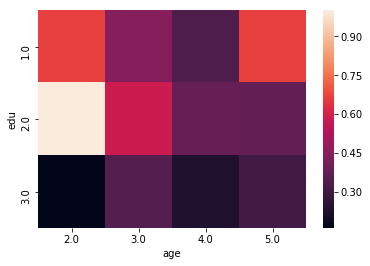

In [91]:
eduANDageGroupGraphing = eduANDageGroup.pivot("edu", "age", "conv. rate")
ax = sns.heatmap(eduANDageGroupGraphing)

Text(0.5,1.05,'Age and Edu Bins')

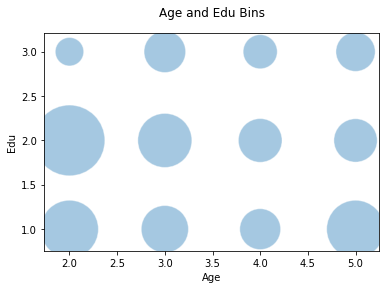

In [92]:
plt.scatter(x = eduANDage['age'], 
            y = eduANDage['edu'], 
            s = eduANDage['conv. ratio']*5000, 
            alpha=0.4, 
            edgecolors='w')

plt.xlabel('Age')
plt.ylabel('Edu')
plt.title('Age and Edu Bins', y=1.05)
